# NPI's on Covid-19 SEIRD model
NPI (Non-Pharmaceutical Intervention)

(SEIRD) Susceptible - Exposed - Infected - Recovered - Death

In [1]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

In [2]:
from graphs.plot_graphs import plot_model_data
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go

### LMFIT (A python tool for model fitting)

In [3]:
%%capture
import sys
!{sys.executable} -m pip install lmfit

In [4]:
%%capture
!{sys.executable} -m pip install matplotlib

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, report_fit
from scipy.integrate import odeint
from model_seird.params import create_params
from model_seird.run_model import run_model
from model_seird.residual import get_residual
from model_seird.derivative import deriv, deriv_time_lockdown

### Strategy without lockdown

In [6]:
incubation_time = 5.0      # Incubation period of five days (1 to 12 days, but 5 days on average)
infective_time = 3.0         # Infectious period may start 1 to 3 days before you develop symptoms
gamma = 1 / infective_time        # Recovery rate
delta = 1 / incubation_time       # Incubation period
R0 = 2                            # Basic reproductive number
beta = R0 * gamma                 # Infection rate: R_0 = beta / gamma, so beta = R_0 * gamma
tay = 0.26                        # Brasil's death rate
khi = 1/18                        # On average, 18 days from infection to death
N = 1

# initial conditions
E0 = 1/20000
I0 = 0.00
R0 = 0.00
D0 = 0.00
S0 = N - E0 - I0 - R0 - D0

In [7]:
# tuple -> (<value>, <vary>)
params = create_params(
    (S0, False), (E0, False), (I0, False), (R0, False), (D0, False), (N, False), 
    (beta, True), (gamma, True), (delta, False), (tay, False), (khi, False)
    )

In [8]:
days = 160
x = np.linspace(0, days, days)
dS, dE, dI, dR, dD = run_model(params, x)

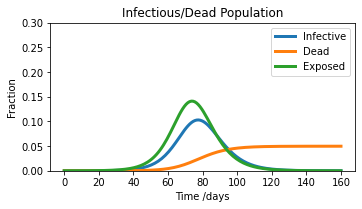

In [9]:
plot_model_data(x, dE, dI, dD)

## Time Strategy lockdown

7-days lockdown per month

In [10]:
incubation_time = 5.0      # Incubation period of five days (1 to 12 days, but 5 days on average)
infective_time = 3.0         # Infectious period may start 1 to 3 days before you develop symptoms
gamma = 1 / infective_time        # Recovery rate
delta = 1 / incubation_time       # Incubation period
def R_0(t):                       # Basic reproductive number
    if t%30 < 7:
        return 1.0
    else:
        return 2.0
def beta(t):                      # Infection rate: R_0 = beta / gamma, so beta = R_0 * gamma
    return R_0(t) * gamma 
tay = 0.26                        # Brasil's death rate
khi = 1/18                        # On average, 18 days from infection to death
N = 1

# initial conditions
E0 = 1/20000
I0 = 0.00
R0 = 0.00
D0 = 0.00
S0 = N - E0 - I0 - R0 - D0

In [11]:
days = 160
x = np.linspace(0, days, days)
y0 = S0, E0, I0, R0, D0

ret = odeint(deriv_time_lockdown, y0, x, args=(N, beta, gamma, delta, tay, khi))
dS, dE, dI, dR, dD = ret.T

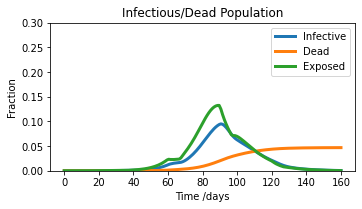

In [12]:
plot_model_data(x, dE, dI, dD)